In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv('iphone_purchase_records.csv')
data.shape

(400, 4)

In [47]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [49]:
data.isna().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

<Axes: xlabel='Purchase Iphone'>

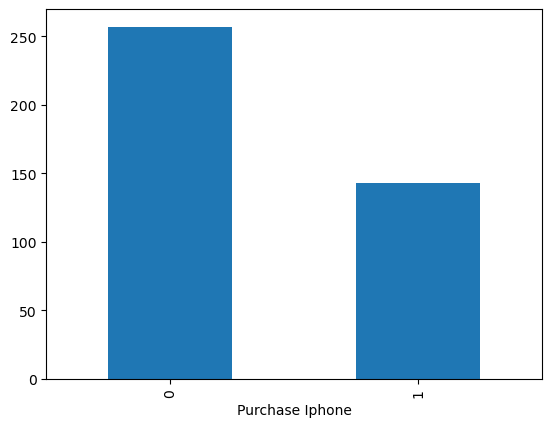

In [50]:
data['Purchase Iphone'].value_counts().plot(kind='bar')

In [114]:
X = data.iloc[:, :-1].values
Y = data.iloc[:,-1].values

In [115]:
X

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [116]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [117]:
#Encoding of Gender 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0]= le.fit_transform(X[:,0])

In [119]:
#Spliting the data sets
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.25, random_state=42)

In [120]:
#apply standard scaling : removing the mean and scale the each variable 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [136]:
#apply SVM 
from sklearn.svm import SVC
model = SVC(probability=True)
#help(model)
#{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
# presently we have rbf kernel running by default. Now lets change the kernel and try
#model = SVC(kernel='linear')

In [122]:
help(classifier)

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `

In [137]:
#Training
model.fit(X_train, Y_train)

SVC(probability=True)

In [138]:
y_pred = model.predict(X_test)

In [139]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
print('confusion_matrix=',confusion_matrix(Y_test, y_pred))
print('accuracy_score=',accuracy_score(Y_test, y_pred))
print('precision_score=',precision_score(Y_test, y_pred))
print('recall_score=',recall_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print('Predict_Probability=',model.predict_proba(X_test))

confusion_matrix= [[58  5]
 [ 2 35]]
accuracy_score= 0.93
precision_score= 0.875
recall_score= 0.9459459459459459
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

Predict_Probability= [[0.10070219 0.89929781]
 [0.15757631 0.84242369]
 [0.9886267  0.0113733 ]
 [0.28158692 0.71841308]
 [0.97330267 0.02669733]
 [0.98939409 0.01060591]
 [0.18126515 0.81873485]
 [0.94904024 0.05095976]
 [0.84992292 0.15007708]
 [0.86457999 0.13542001]
 [0.9823594  0.0176406 ]
 [0.05663029 0.94336971]
 [0.9817357  0.0182643 ]
 [0.92787332 0.07212668]
 [0.9089625  0.0910375 ]
 [0.18920392 0.81079608]
 [0.07815509 0.92184491]
 [0.65798751 0.34201249]
 [0.93992751 0.06007249]
 [0.10758271 0.89241729]
 [0.95403961 0.04596039]
 [0.96367573 

In [127]:
#if you want ROC, AUC then make sure probability is True during model creation
#model= SVC(probabilities = True)

In [141]:
from sklearn.metrics import roc_auc_score, roc_curve
print('auc_score=',roc_auc_score(Y_test, pred_prob[:,1]))
fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1])

auc_score= 0.9721149721149722


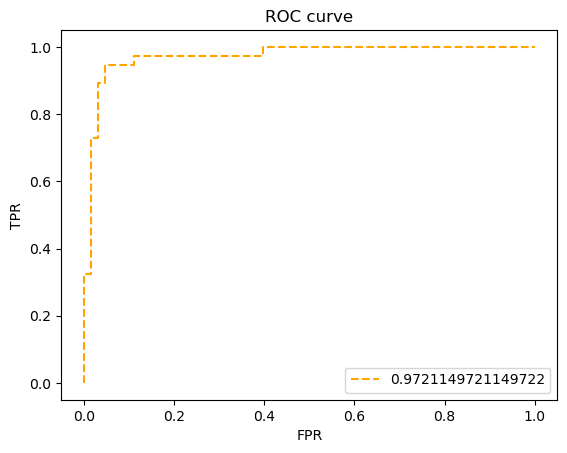

In [142]:
fig,ax=plt.subplots()
ax.set_facecolor('white')
plt.plot(fpr,tpr,linestyle = '--', color = 'orange', label=auc_score)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt. title('ROC curve')
plt.legend(loc='best')